<a href="https://colab.research.google.com/github/akhilsrinath/soccer-analytics/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Visualization**

Visualizing data from the 2018 Men's World Cup Final. 

In [1]:
# Importing soccer utils - credit: Devin Pleuler 

!pip install git+https://github.com/devinpleuler/analytics-handbook.git 

  Cloning https://github.com/devinpleuler/analytics-handbook.git to /tmp/pip-req-build-4cm5w7or
  Running command git clone -q https://github.com/devinpleuler/analytics-handbook.git /tmp/pip-req-build-4cm5w7or
  Created wheel for AnalyticsHandbook: filename=AnalyticsHandbook-0.2.dev0-py3-none-any.whl size=16401 sha256=6223317af85fbce2d4ff0735731c51a35f5cee2b67fc4119a76c98ed9e8d2ce9
  Stored in directory: /tmp/pip-ephem-wheel-cache-qfau_mho/wheels/8c/17/b2/8fdb75d34ee815f2ba836faf70a07efe99f512df0d08c42bfd
Successfully built AnalyticsHandbook


In [2]:
from soccerutils.statsbomb import get_events 
from soccerutils.pitch import Pitch

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

The get_events function loads all events from a single game (or comptetition, season) into a single list. 
The Pitch function helps us visualize field lines. 

StatsBomb's match_id for the 2018 WC Final is 8658.

In [3]:
match_id = 8658
raw_events = get_events(match_id=match_id)


In [5]:
len(raw_events)

2978

In [7]:
lineups = raw_events[0:2]
team_lineup = lineups[1]    # 0 - home, 1 - away
team_id = team_lineup['team']['id']

In [8]:
lineups

[{'duration': 0.0,
  'id': '47638847-fd43-4656-b49c-cff64e5cfc0a',
  'index': 1,
  'minute': 0,
  'period': 1,
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'possession': 1,
  'possession_team': {'id': 771, 'name': 'France'},
  'second': 0,
  'tactics': {'formation': 442,
   'lineup': [{'jersey_number': 1,
     'player': {'id': 3099, 'name': 'Hugo Lloris'},
     'position': {'id': 1, 'name': 'Goalkeeper'}},
    {'jersey_number': 2,
     'player': {'id': 5476, 'name': 'Benjamin Pavard'},
     'position': {'id': 2, 'name': 'Right Back'}},
    {'jersey_number': 4,
     'player': {'id': 5485, 'name': 'Raphaël Varane'},
     'position': {'id': 3, 'name': 'Right Center Back'}},
    {'jersey_number': 5,
     'player': {'id': 5492, 'name': 'Samuel Yves Umtiti'},
     'position': {'id': 5, 'name': 'Left Center Back'}},
    {'jersey_number': 21,
     'player': {'id': 5484, 'name': 'Lucas Hernández Pi'},
     'position': {'id': 6, 'name': 'Left Back'}},
    {'jersey_number': 6,
     'pla

In [9]:
team_lineup

{'duration': 1.412,
 'id': '0c04305d-5615-4520-9be5-7c232829954b',
 'index': 2,
 'minute': 0,
 'period': 1,
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'possession': 1,
 'possession_team': {'id': 771, 'name': 'France'},
 'second': 0,
 'tactics': {'formation': 433,
  'lineup': [{'jersey_number': 23,
    'player': {'id': 3444, 'name': 'Danijel Subašić'},
    'position': {'id': 1, 'name': 'Goalkeeper'}},
   {'jersey_number': 2,
    'player': {'id': 5461, 'name': 'Šime Vrsaljko'},
    'position': {'id': 2, 'name': 'Right Back'}},
   {'jersey_number': 6,
    'player': {'id': 3471, 'name': 'Dejan Lovren'},
    'position': {'id': 3, 'name': 'Right Center Back'}},
   {'jersey_number': 21,
    'player': {'id': 5468, 'name': 'Domagoj Vida'},
    'position': {'id': 5, 'name': 'Left Center Back'}},
   {'jersey_number': 3,
    'player': {'id': 5457, 'name': 'Ivan Strinić'},
    'position': {'id': 6, 'name': 'Left Back'}},
   {'jersey_number': 11,
    'player': {'id': 5469, 'name': 'Marcelo

In [10]:
team_id

785

In [11]:
## Team starters 
## Dictionary containing player id as key and associated name and jersey number as value

starters = {p['player']['id']: {"name": p['player']['name'], 'jersey_number': p['jersey_number']} for p in team_lineup['tactics']['lineup']}


In [12]:
starters

{3444: {'jersey_number': 23, 'name': 'Danijel Subašić'},
 3471: {'jersey_number': 6, 'name': 'Dejan Lovren'},
 5457: {'jersey_number': 3, 'name': 'Ivan Strinić'},
 5461: {'jersey_number': 2, 'name': 'Šime Vrsaljko'},
 5463: {'jersey_number': 10, 'name': 'Luka Modrić'},
 5465: {'jersey_number': 18, 'name': 'Ante Rebić'},
 5468: {'jersey_number': 21, 'name': 'Domagoj Vida'},
 5469: {'jersey_number': 11, 'name': 'Marcelo Brozović'},
 5470: {'jersey_number': 7, 'name': 'Ivan Rakitić'},
 5472: {'jersey_number': 17, 'name': 'Mario Mandžukić'},
 5474: {'jersey_number': 4, 'name': 'Ivan Perišić'}}

In [13]:
events = [ e for e in raw_events if e['team']['id'] == team_id]
passes = [e for e in raw_events if 'pass' in e.keys()]


We generate the passing matrix: The general form is `matrix[player_a][player_b][passes]`

In [15]:
matrix = {}
for p in passes:
  if 'outcome' not in p['pass'].keys():
    passer_id = p['player']['id']
    recipient_id = p['pass']['recipient']['id']

    a,b = sorted([passer_id, recipient_id])

    if a not in matrix.keys():
      matrix[a] = {}
    
    if b not in matrix[a].keys():
      matrix[a][b] = 0

    matrix[a][b] += 1

We now create a position dictonary of player event locations. We can also calculate the average position of players across the lineup for all the starters. 

In [16]:
positions = {}
for e in events: 

  if 'player' in e.keys():
    player_id = e['player']['id']
    if player_id not in positions.keys():
      positions[player_id] = {"x":[], "y":[]}

    if 'location' in e.keys():
      positions[player_id]['x'].append(e['location'][0])
      positions[player_id]['y'].append(80-e['location'][1])


avg_positions = {k:[np.mean(v['x']),np.mean(v['y'])] for k, v in positions.items() if k in starters.keys()}

In [18]:
len(avg_positions)

11

We now loop throught the passing matrix, and build lines for each passing combination, and store line weights(i.e the volume of passes exchanged)

In [21]:
lines = []
weights = []

for k,v in matrix.items():
  if k in starters.keys():
    origin = avg_positions[k]
    for k_, v_ in matrix[k].items():
      if k_ in starters.keys():
        dest = avg_positions[k_]
        lines.append([*origin, *dest])
        weights.append(v_)

Now that we have all the combinations of passes and the volume of passes, we build a Pitch object, and add the various lines and points with pitch.draw_lines and pitch.draw_points. 

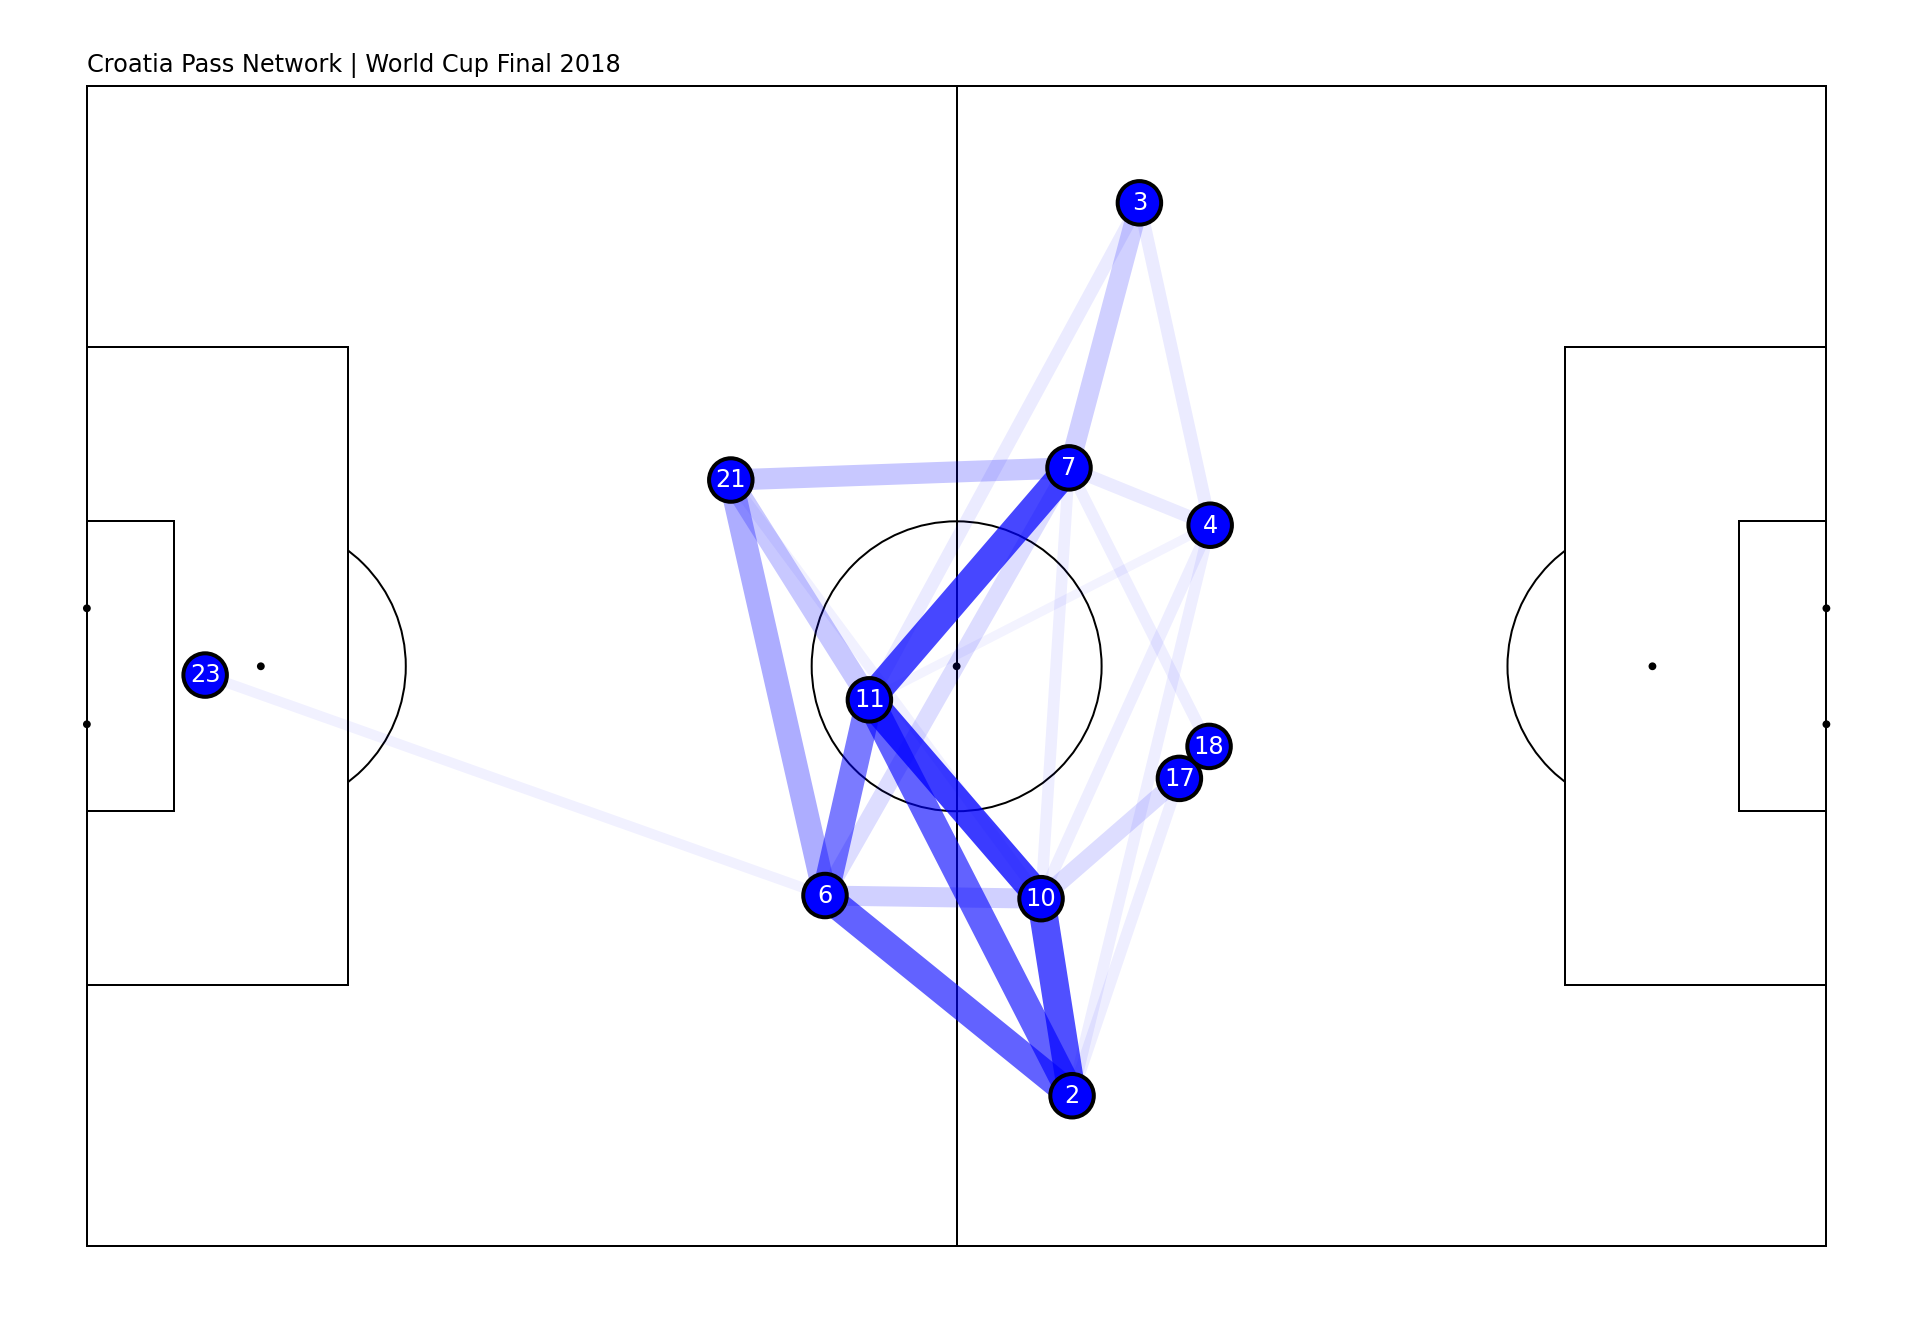

In [25]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_aspect(1)
pitch = Pitch(title="Croatia Pass Network | World Cup Final 2018")
pitch.create_pitch(ax)

fill_adj = lambda x: 0.8 / (1 + np.exp(-(x-20)*0.2))
weight_adj = lambda x: 2 / (1 + np.exp(-(x-10)*0.2))

for i, e in enumerate(lines):
    
    cosmetics = {
        'width': weight_adj(weights[i]),
        'head_width': 0,
        'head_length': 0,
        'facecolor': (0, 0, 1, fill_adj(weights[i])),
        'edgecolor': (0, 0, 0, 0)
    }
    if weights[i] > 5:
        pitch.draw_lines(ax, [e], cosmetics=cosmetics)


cosmetics = {
    'linewidth': 2,
    'facecolor': (0, 0, 1, 1),
    'edgecolor': (0, 0, 0, 1),
    'radius': 1.5
}
pitch.draw_points(ax, [xy for k, xy in avg_positions.items()], cosmetics=cosmetics)

for k, v in avg_positions.items():
    jersey = starters[k]['jersey_number']
    x,y = v
    
    ax.text(pitch.x_adj(x), pitch.y_adj(y),
            jersey, fontsize=12,
            ha='center', va='center',
            color='white')


plt.ylim(pitch.ylim)
plt.xlim(pitch.xlim)
plt.axis('off')
plt.show()